In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import anndata

from dredFISH.Design import PNMF
from dredFISH.Analysis import basicu
from dredFISH.Analysis.__init__plots import * 

import importlib
importlib.reload(PNMF)


<module 'dredFISH.Design.PNMF' from '/bigstore/GeneralStorage/fangming/projects/dredfish/packages/dredFISH/dredFISH/Design/PNMF.py'>

In [2]:
prj_dir = '/bigstore/GeneralStorage/fangming/projects/dredfish/'
dat_dir = prj_dir + 'data/'
res_dir = prj_dir + 'data_dump/'
fig_dir = prj_dir + 'figures/'

# data
scrna_genes_path = '/bigstore/GeneralStorage/fangming/projects/dredfish/data/rna/scrna_ss_ctxhippo_a_exon_DPNMF_genes_matrix.h5ad'

In [3]:
%%time
# allen scrna matrix
adata = anndata.read_h5ad(scrna_genes_path) # library size normed (no log)
adata

CPU times: user 443 ms, sys: 840 ms, total: 1.28 s
Wall time: 1.28 s


AnnData object with n_obs × n_vars = 73347 × 5576
    obs: 'donor_sex_id', 'donor_sex_label', 'donor_sex_color', 'region_id', 'region_label', 'region_color', 'platform_label', 'cluster_order', 'cluster_label', 'cluster_color', 'subclass_order', 'subclass_label', 'subclass_color', 'neighborhood_id', 'neighborhood_label', 'neighborhood_color', 'class_order', 'class_label', 'class_color', 'exp_component_name', 'external_donor_name_label', 'full_genotype_label', 'facs_population_plan_label', 'injection_roi_label', 'injection_materials_label', 'injection_method_label', 'injection_type_label', 'full_genotype_id', 'full_genotype_color', 'external_donor_name_id', 'external_donor_name_color', 'facs_population_plan_id', 'facs_population_plan_color', 'injection_materials_id', 'injection_materials_color', 'injection_method_id', 'injection_method_color', 'injection_roi_id', 'injection_roi_color', 'injection_type_id', 'injection_type_color', 'cell_type_accession_label', 'cell_type_alias_label', 'cel

In [4]:
%%time
X = np.array(adata.X.todense()).copy() # already library size normalized
logX = np.log10(X+1)

CPU times: user 5.83 s, sys: 2.31 s, total: 8.14 s
Wall time: 8.14 s


In [5]:
%%time
# run PNMF logtrans -- recommended by them
w, rec = PNMF.get_PNMF(logX.T, k=24, verbose=True, report_stride=1)

1 14.47460563118534
2 0.049631355166319446
3 0.011595117261742394
4 0.0028908866184451654
5 0.0007217032001438951
6 0.00018078864060966718
7 4.767569012248396e-05
8 1.5299678196578625e-05
9 7.550190983699606e-06
CPU times: user 1min 43s, sys: 2.94 s, total: 1min 46s
Wall time: 9.67 s


In [6]:
%%time
# run PNMF orig -- what we do and have to do
w2, rec2 = PNMF.get_PNMF(X.T, k=24, verbose=True, report_stride=20)

20 0.0035000627046089527
40 0.000727221913543033
60 0.0007426409367843924
80 0.00036370643960576335
100 0.0003326619659738163
120 0.00033329980551699556
140 0.0002759617254835568
160 0.0005086821976907491
180 0.00019348953093080434
200 0.00012854953017910845
220 0.00017649203833147113
240 0.00011607497387234114
260 7.990585145864829e-05
280 6.804830105902951e-05
300 7.799723599347195e-05
320 0.0001647870436230492
340 0.0003521595028301329
360 5.931069002749535e-05
380 4.0740678995004366e-05
400 3.620603117628074e-05
420 3.176237630517307e-05
440 2.708528546686243e-05
460 2.3146734384423863e-05
480 2.0052359821568812e-05
500 1.8167238791120264e-05
520 1.700669786293494e-05
540 1.593827350389863e-05
560 1.4947974925245153e-05
580 1.391099985366428e-05
600 1.2734820724366483e-05
620 1.153082680181765e-05
640 1.026086129152226e-05
CPU times: user 41min 24s, sys: 1min 21s, total: 42min 45s
Wall time: 2min 43s


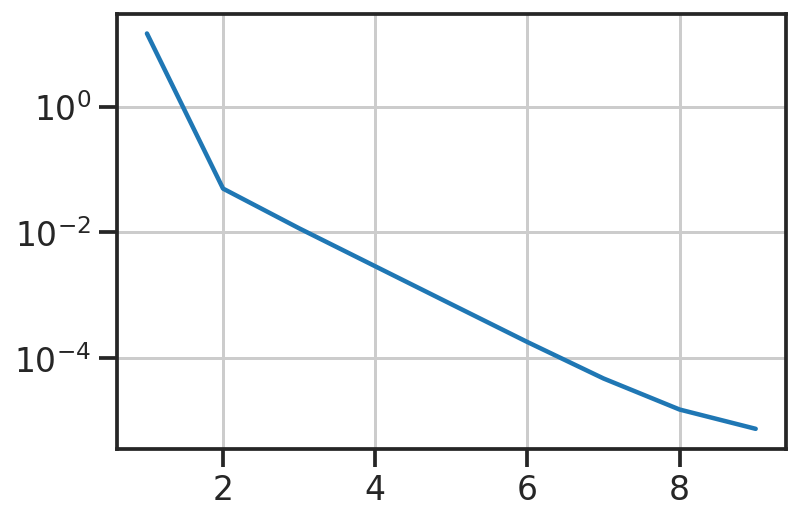

In [7]:
plt.plot(rec[:,0], rec[:,1])
plt.yscale('log')

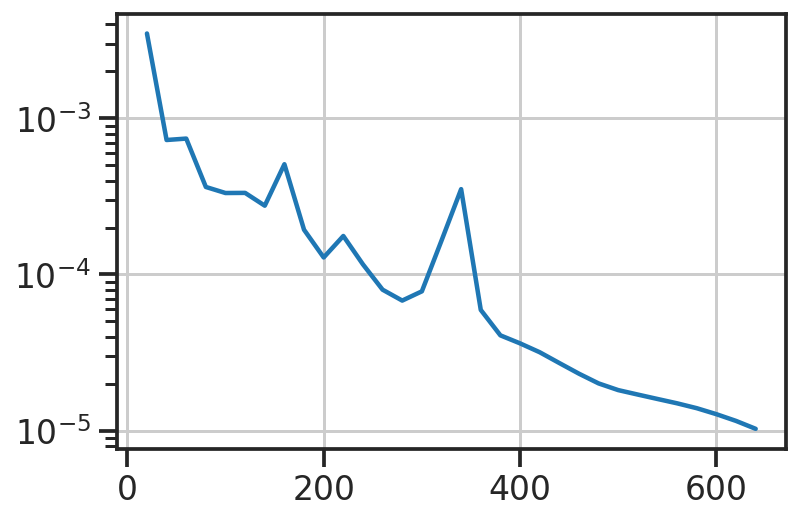

In [8]:
plt.plot(rec2[:,0], rec2[:,1])
plt.yscale('log')

In [9]:
np.linalg.norm(w, 2), np.max(w), np.min(w)

(1.0, 0.036488146, 0.0)

In [10]:
np.linalg.norm(w2, 2), np.max(w2), np.min(w2)

(1.0, 0.9451533, 0.0)

In [11]:
(w < 1e-7).sum(), (w2 < 1e-7).sum()

(68, 88578)

In [12]:
(w < 1e-6).sum(), (w2 < 1e-6).sum()

(381, 95379)

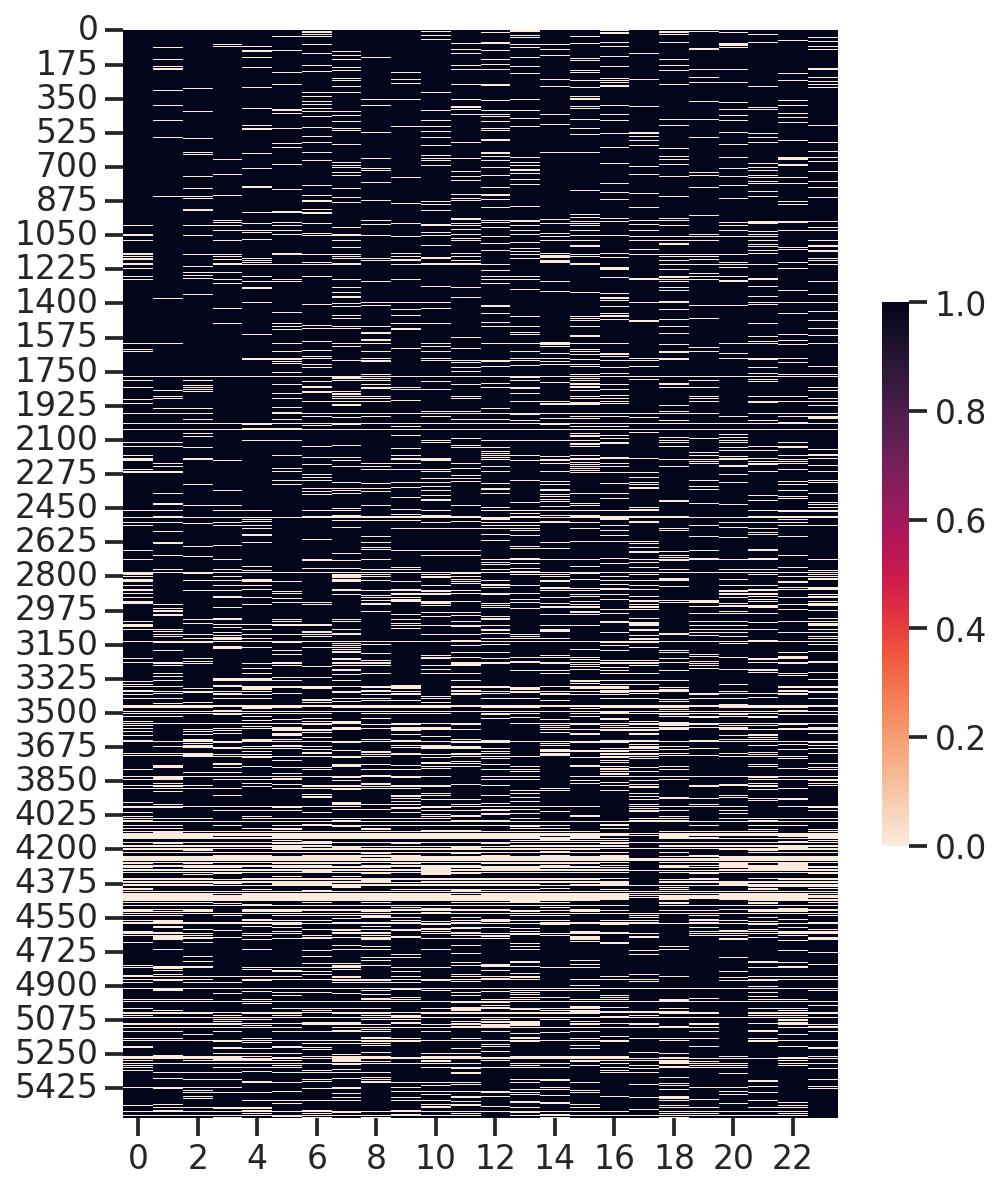

In [13]:
wnew, rows, cols = basicu.diag_matrix_rows(w)

fig, ax = plt.subplots(figsize=(8,10))
sns.heatmap(wnew>(1.0/120)*np.max(wnew), 
            ax=ax, 
            cmap='rocket_r', 
            cbar_kws=dict(shrink=0.5),
           )
plt.show()

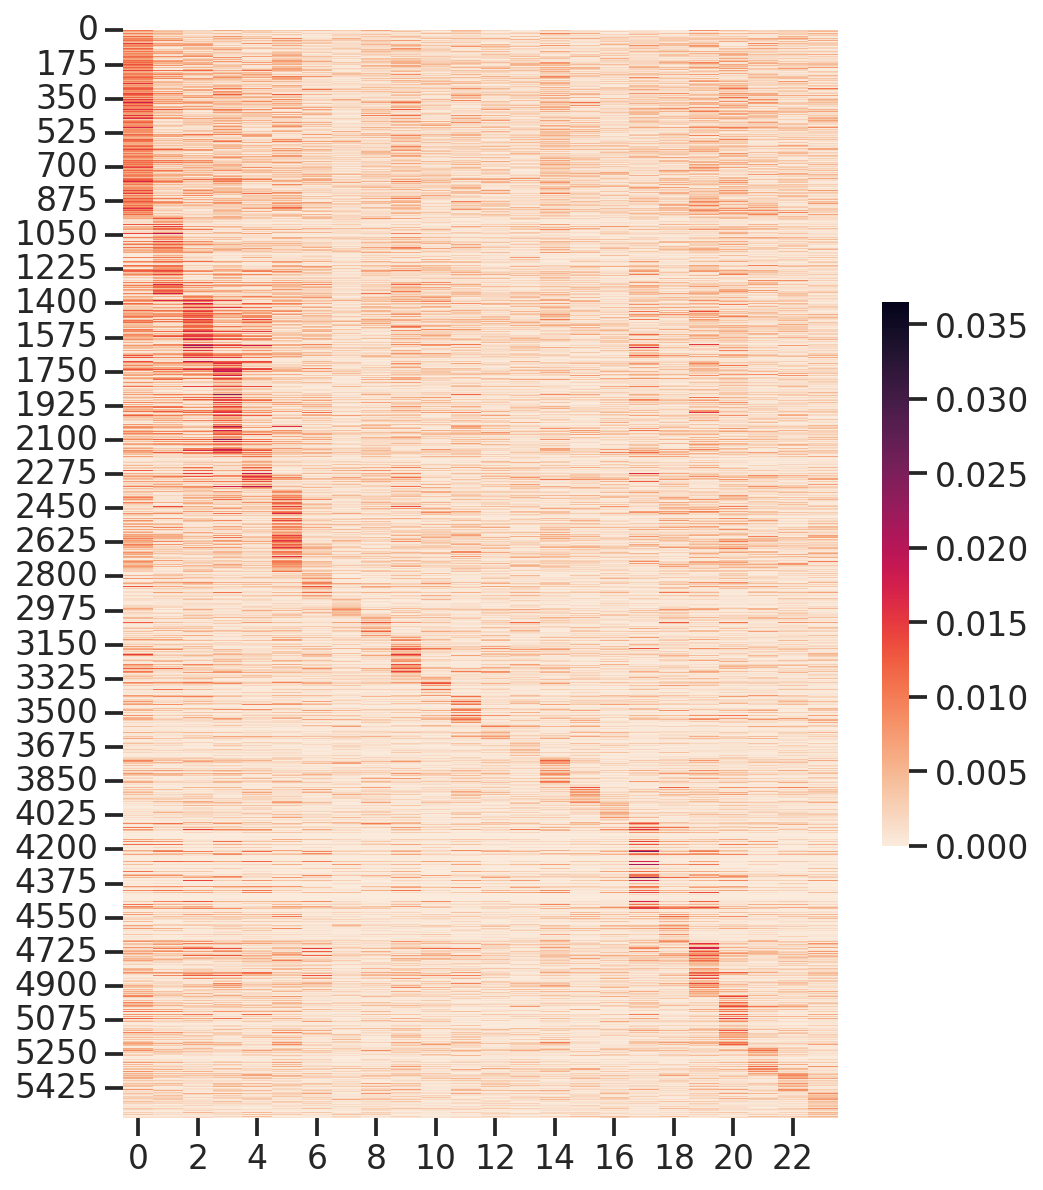

In [14]:
wnew, rows, cols = basicu.diag_matrix_rows(w)

fig, ax = plt.subplots(figsize=(8,10))
sns.heatmap(
    # np.log10(wnew+1), 
    wnew,
            ax=ax, 
            cmap='rocket_r', 
            cbar_kws=dict(shrink=0.5),
           )
plt.show()

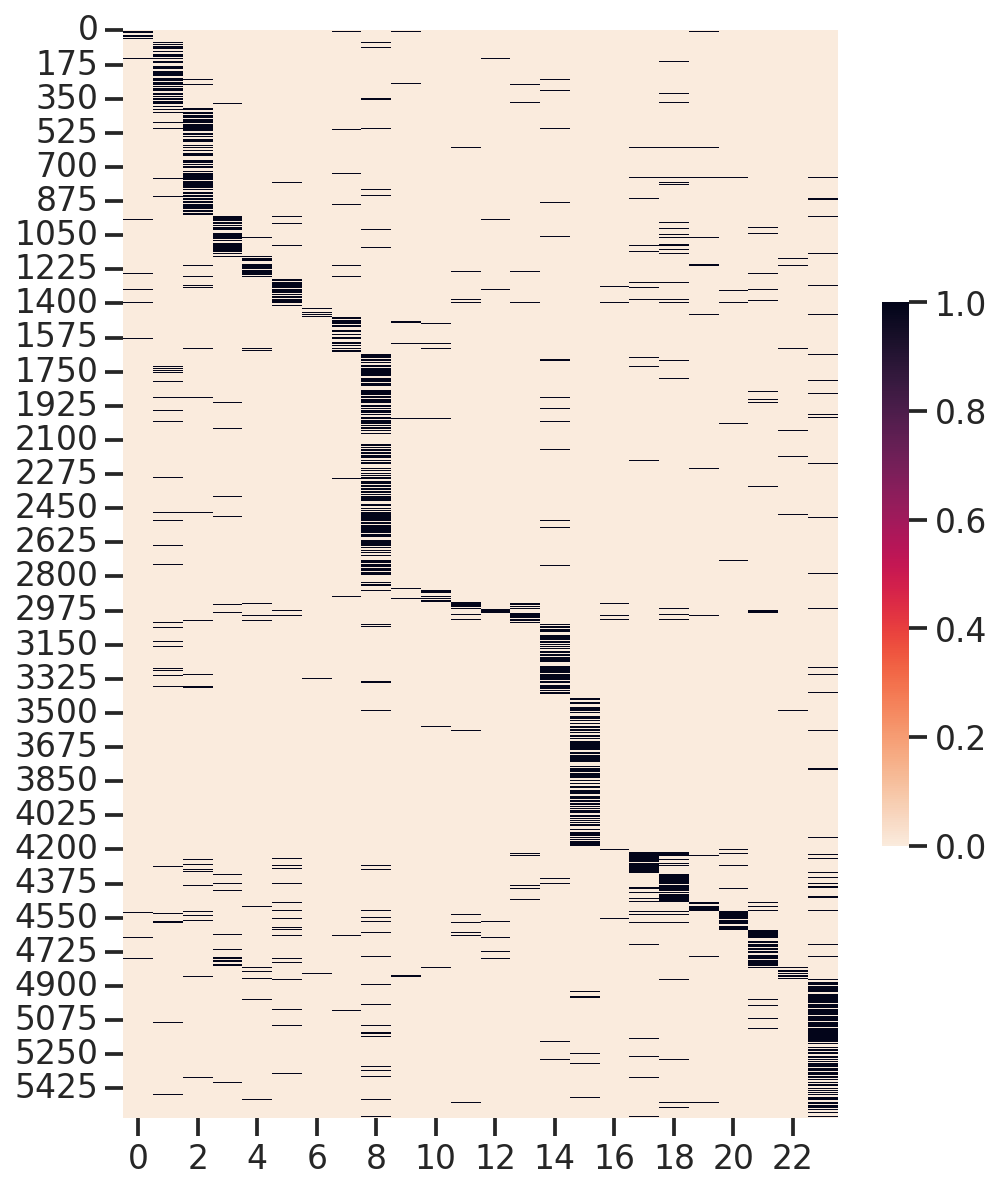

In [15]:
w2new, rows, cols = basicu.diag_matrix_rows(w2)

fig, ax = plt.subplots(figsize=(8,10))
sns.heatmap(w2new>1.0/120*np.max(w2new), 
            ax=ax, 
            cmap='rocket_r', 
            cbar_kws=dict(shrink=0.5),
           )
plt.show()

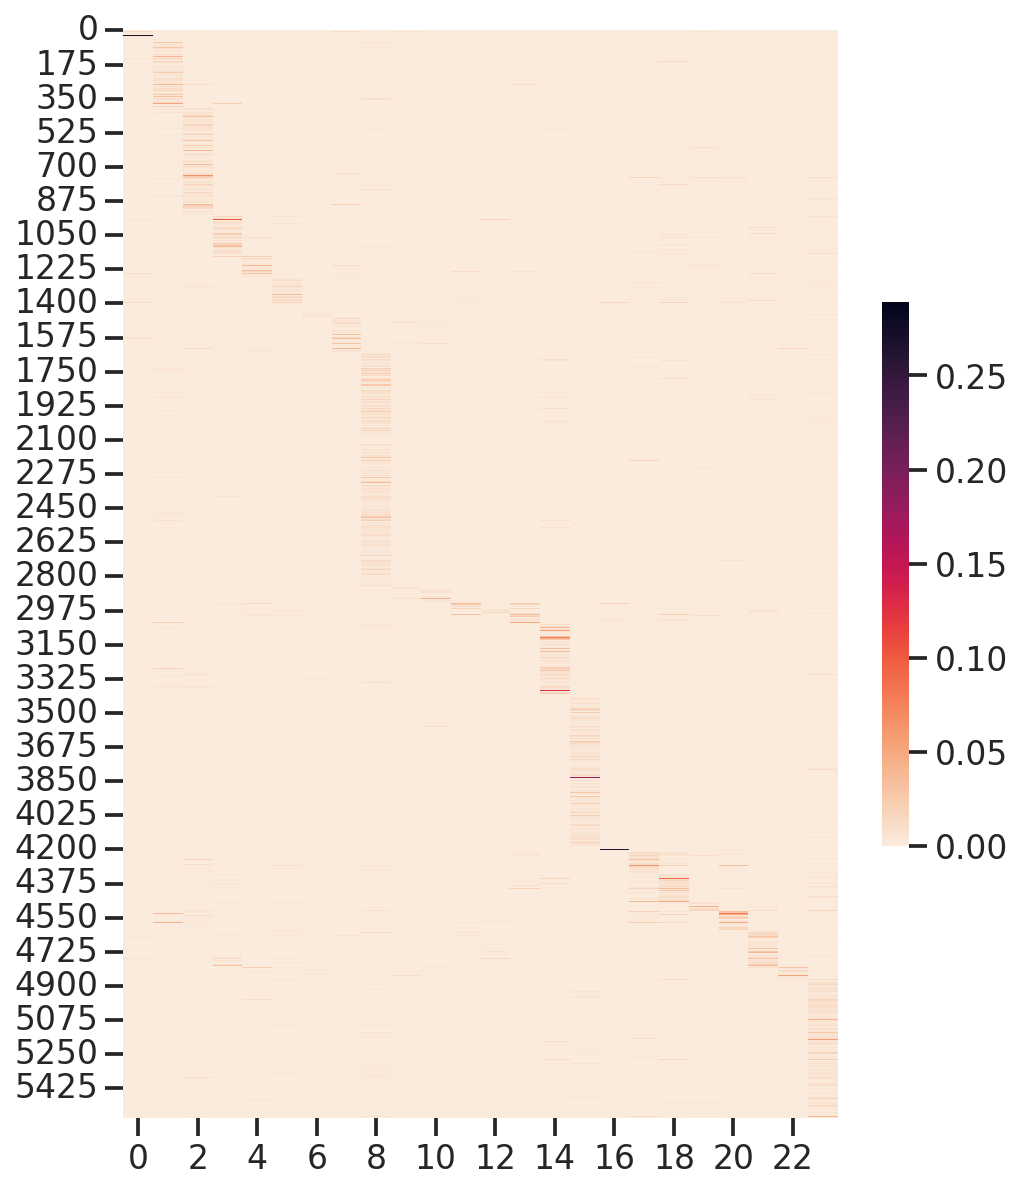

In [16]:
w2new, rows, cols = basicu.diag_matrix_rows(w2)

fig, ax = plt.subplots(figsize=(8,10))
sns.heatmap(np.log10(w2new+1), 
            ax=ax, 
            cmap='rocket_r', 
            cbar_kws=dict(shrink=0.5),
           )
plt.show()

# plot distribution

In [37]:
k = 24
pm = sns.color_palette('rocket', n_colors=k)
pm

[(0.0618531, 0.04504866, 0.13804929),
 (0.11813947, 0.06961499, 0.17821272),
 (0.17489524, 0.08848235, 0.2190294),
 (0.23334047, 0.10263737, 0.25697736),
 (0.29977678, 0.11356089, 0.29254823),
 (0.36196644, 0.1195413, 0.31852037),
 (0.42569057, 0.12178916, 0.33806605),
 (0.49083761, 0.11998161, 0.35111537),
 (0.56405586, 0.11235265, 0.35804813),
 (0.63139686, 0.10067417, 0.35664819),
 (0.69803757, 0.08897226, 0.3462986),
 (0.76145589, 0.09050716, 0.32637117),
 (0.82341472, 0.12535343, 0.2963705),
 (0.87079129, 0.17982114, 0.26797378),
 (0.90848638, 0.24568473, 0.24598324),
 (0.93262051, 0.3215093, 0.24606461),
 (0.94727016, 0.4055909, 0.27902322),
 (0.95510255, 0.47787236, 0.32862553),
 (0.96004345, 0.54657593, 0.3870292),
 (0.96298491, 0.6126247, 0.45145074),
 (0.96467922, 0.68283846, 0.53000231),
 (0.96612013, 0.74451182, 0.60871954),
 (0.96935926, 0.80395415, 0.69383201),
 (0.97441222, 0.86238689, 0.78015619)]

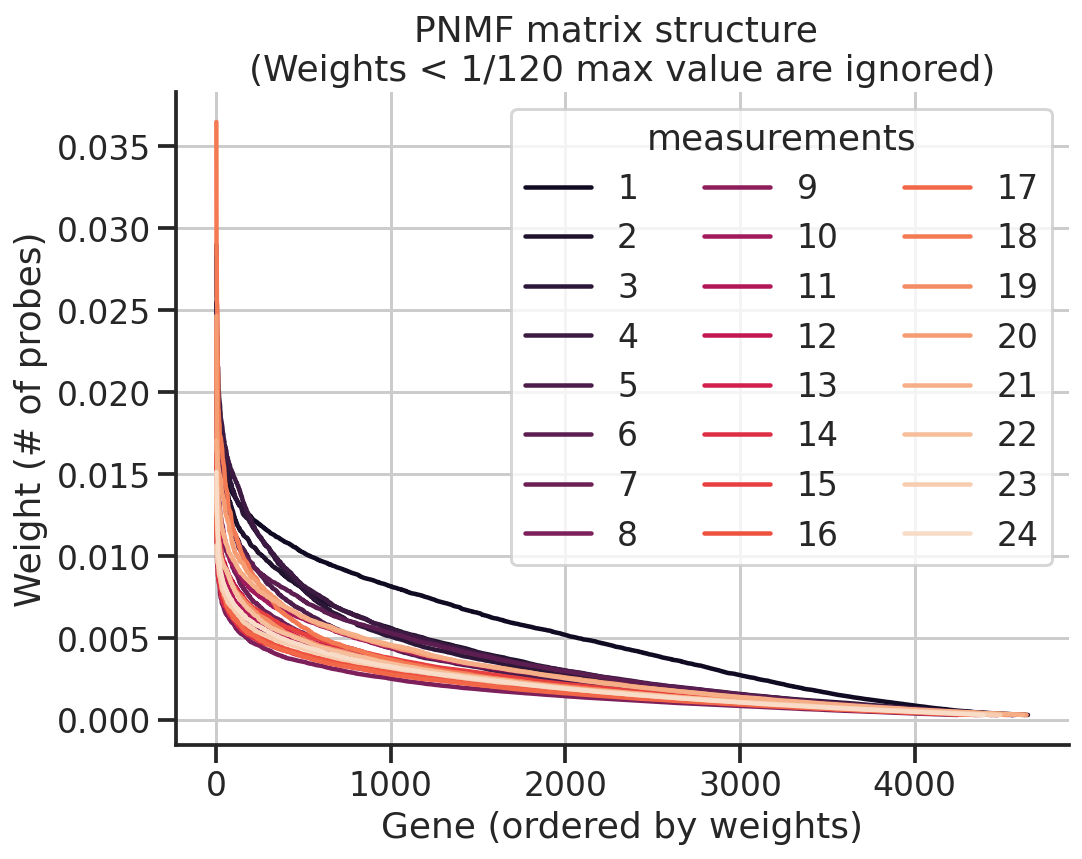

In [38]:
pmat = pd.DataFrame(w)
cutoff = 1/120*np.max(pmat.values)

fig, ax = plt.subplots(figsize=(8,6))
for i, col in enumerate(pmat):
    _x = pmat[col]
    _x = np.flip(np.sort(_x[_x>0])) #[:,:,-1]
    _x = _x[_x > cutoff]
    ax.plot(_x, color=pm[i], label=f'{i+1}')
ax.set_xlabel('Gene (ordered by weights)')
ax.set_ylabel('Weight (# of probes)')
sns.despine(ax=ax)
ax.set_title('PNMF matrix structure \n(Weights < 1/120 max value are ignored)')
ax.legend(ncol=3, title='measurements')

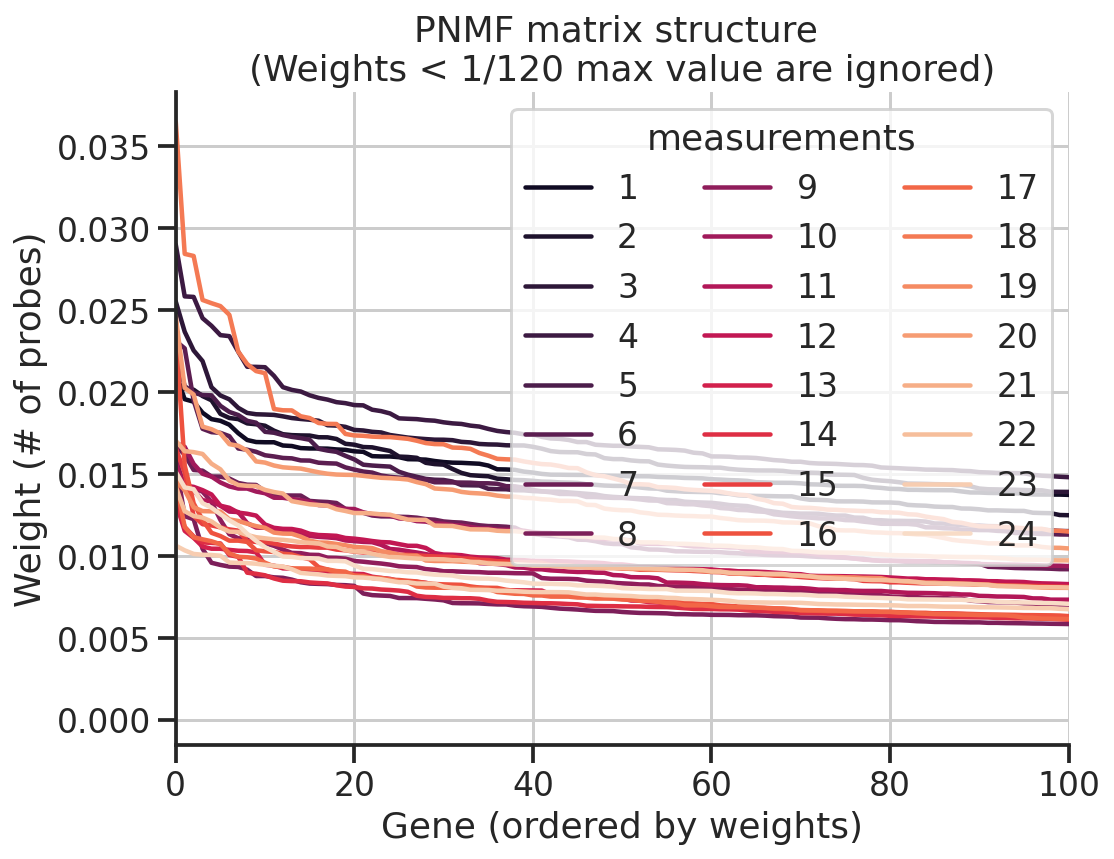

In [39]:
# pm = sns.color_palette('husl', n_colors=k)
pmat = pd.DataFrame(w)
cutoff = 1/120*np.max(pmat.values)

fig, ax = plt.subplots(figsize=(8,6))
for i, col in enumerate(pmat):
    _x = pmat[col]
    _x = np.flip(np.sort(_x[_x>0])) #[:,:,-1]
    _x = _x[_x > cutoff]
    ax.plot(_x, color=pm[i], label=f'{i+1}')
    ax.set_xlim(xmin=0,xmax=100)
ax.set_xlabel('Gene (ordered by weights)')
ax.set_ylabel('Weight (# of probes)')
sns.despine(ax=ax)
ax.set_title('PNMF matrix structure \n(Weights < 1/120 max value are ignored)')
ax.legend(ncol=3, title='measurements')

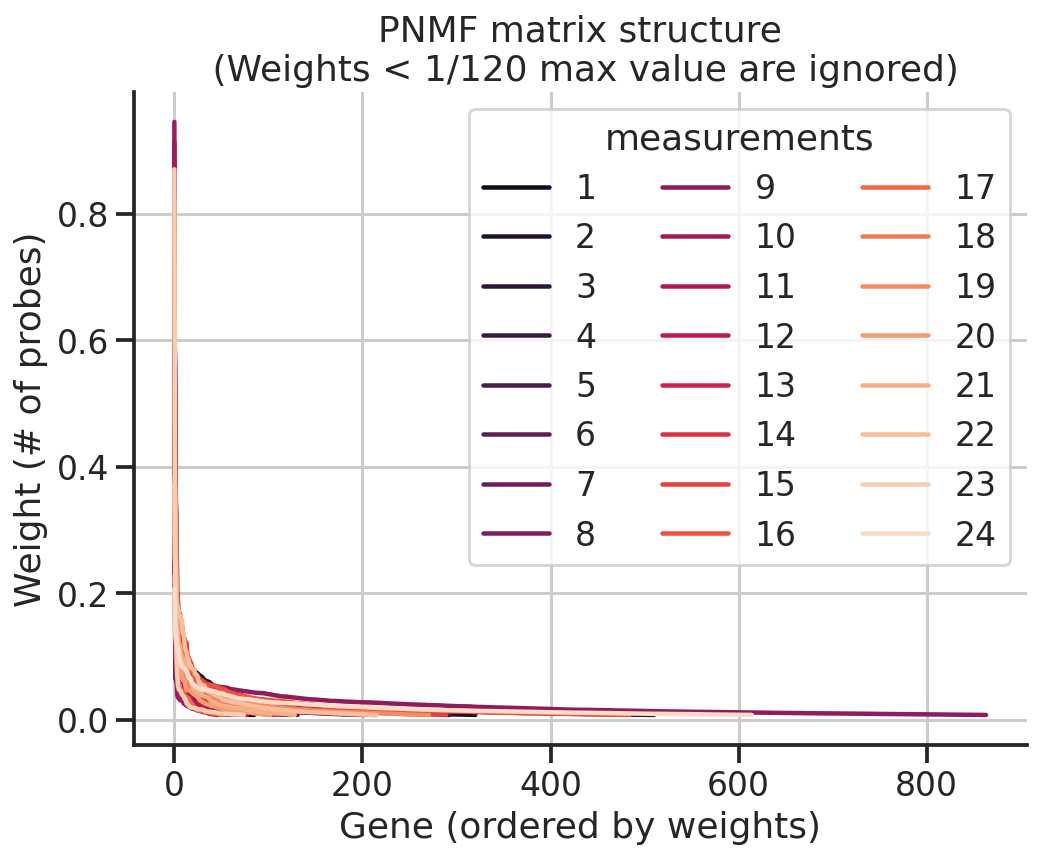

In [40]:
# pm = sns.color_palette('husl', n_colors=k)
pmat = pd.DataFrame(w2)
cutoff = 1/120*np.max(pmat.values)

fig, ax = plt.subplots(figsize=(8,6))
for i, col in enumerate(pmat):
    _x = pmat[col]
    _x = np.flip(np.sort(_x[_x>0])) #[:,:,-1]
    _x = _x[_x > cutoff]
    ax.plot(_x, color=pm[i], label=f'{i+1}')
ax.set_xlabel('Gene (ordered by weights)')
ax.set_ylabel('Weight (# of probes)')
sns.despine(ax=ax)
ax.set_title('PNMF matrix structure\n (Weights < 1/120 max value are ignored)')
ax.legend(ncol=3, title='measurements')

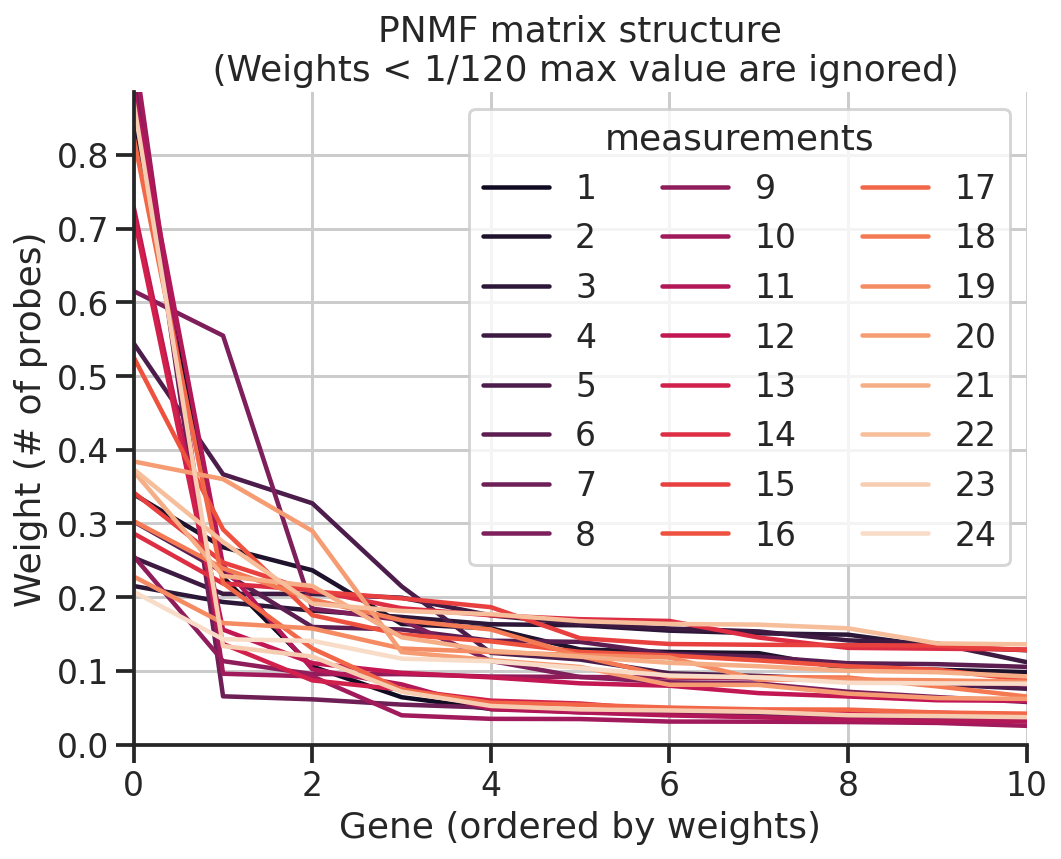

In [41]:
# pm = sns.color_palette('husl', n_colors=k)
pmat = pd.DataFrame(w2)
cutoff = 1/120*np.max(pmat.values)

fig, ax = plt.subplots(figsize=(8,6))
for i, col in enumerate(pmat):
    _x = pmat[col]
    _x = np.flip(np.sort(_x[_x>0])) #[:,:,-1]
    _x = _x[_x > cutoff]
    ax.plot(_x, color=pm[i], label=f'{i+1}')
    # ax.set_yscale('log')
    # ax.set_xscale('log')
    ax.set_ylim(ymin=0)
    ax.set_xlim(xmin=0,xmax=10)
ax.set_xlabel('Gene (ordered by weights)')
ax.set_ylabel('Weight (# of probes)')
sns.despine(ax=ax)
ax.set_title('PNMF matrix structure\n (Weights < 1/120 max value are ignored)')
ax.legend(ncol=3, title='measurements')

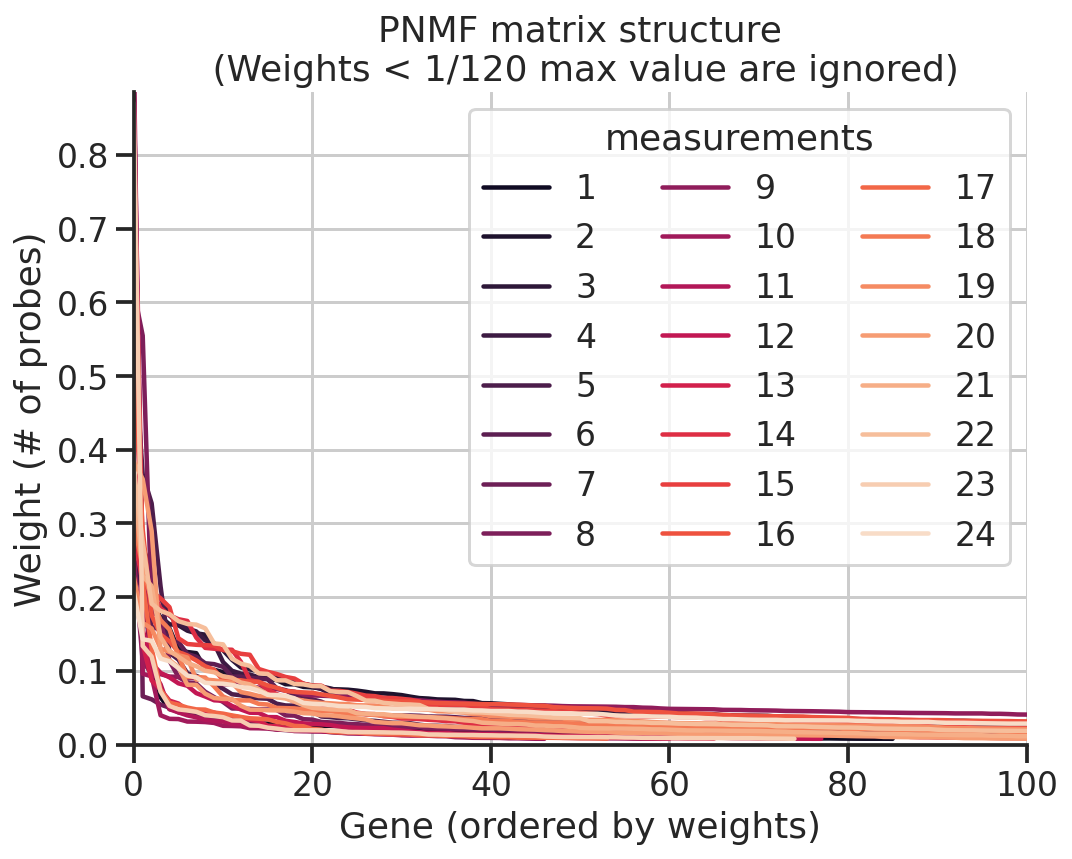

In [42]:
# pm = sns.color_palette('husl', n_colors=k)
pmat = pd.DataFrame(w2)
cutoff = 1/120*np.max(pmat.values)

fig, ax = plt.subplots(figsize=(8,6))
for i, col in enumerate(pmat):
    _x = pmat[col]
    _x = np.flip(np.sort(_x[_x>0])) #[:,:,-1]
    _x = _x[_x > cutoff]
    ax.plot(_x, color=pm[i], label=f'{i+1}')
    # ax.set_yscale('log')
    # ax.set_xscale('log')
    ax.set_ylim(ymin=0)
    ax.set_xlim(xmin=0,xmax=100)
ax.set_xlabel('Gene (ordered by weights)')
ax.set_ylabel('Weight (# of probes)')
sns.despine(ax=ax)
ax.set_title('PNMF matrix structure\n (Weights < 1/120 max value are ignored)')
ax.legend(ncol=3, title='measurements')